# CHRONIC KIDNEY DISEASE CLASSIFICATION

Import all the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve
import warnings
warnings.filterwarnings('ignore')

Load and print the data

In [2]:
data = pd.read_csv("C:/Users/avk/Downloads/kidney_disease.csv")
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [3]:
data=data.dropna(axis=0)

In [4]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

print the head of the data

In [5]:
data.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
11,11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,...,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
14,14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,...,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
20,20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd


print the tail of the data

In [6]:
data.tail(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


print the info of the data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 3 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              158 non-null    int64  
 1   age             158 non-null    float64
 2   bp              158 non-null    float64
 3   sg              158 non-null    float64
 4   al              158 non-null    float64
 5   su              158 non-null    float64
 6   rbc             158 non-null    object 
 7   pc              158 non-null    object 
 8   pcc             158 non-null    object 
 9   ba              158 non-null    object 
 10  bgr             158 non-null    float64
 11  bu              158 non-null    float64
 12  sc              158 non-null    float64
 13  sod             158 non-null    float64
 14  pot             158 non-null    float64
 15  hemo            158 non-null    float64
 16  pcv             158 non-null    object 
 17  wc              158 non-null    obj

print the datatype of the data

In [8]:
data.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

# Data Cleaning

Finding the null values

In [9]:
data.isnull()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
data.isnull().any()

id                False
age               False
bp                False
sg                False
al                False
su                False
rbc               False
pc                False
pcc               False
ba                False
bgr               False
bu                False
sc                False
sod               False
pot               False
hemo              False
pcv               False
wc                False
rc                False
htn               False
dm                False
cad               False
appet             False
pe                False
ane               False
classification    False
dtype: bool

In [11]:
data.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

# Filling the null value

In [12]:
data=data.fillna(method='bfill')

finding the null values

In [13]:
data.isnull().any()

id                False
age               False
bp                False
sg                False
al                False
su                False
rbc               False
pc                False
pcc               False
ba                False
bgr               False
bu                False
sc                False
sod               False
pot               False
hemo              False
pcv               False
wc                False
rc                False
htn               False
dm                False
cad               False
appet             False
pe                False
ane               False
classification    False
dtype: bool

In [14]:
data.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

Converting the datavalues to lowercase

In [15]:
data.columns = data.columns.str.lower()
data.rbc = data.rbc.str.lower()
data.pc = data.pc.str.lower()
data.pcc = data.pcc.str.lower()
data.ba = data.ba.str.lower()
data.htn = data.htn.str.lower()
data.dm = data.dm.str.lower()
data.cad = data.cad.str.lower()
data.appet = data.appet.str.lower()
data.pe = data.pe.str.lower()
data.ane = data.ane.str.lower()
data.classification = data.classification.str.lower()

Printing the datatype and data

In [16]:
data.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [17]:
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
11,11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,...,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
14,14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,...,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
20,20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


# ENCODING

Encoding the categorical values of each columns in dataset into numerical values

In [18]:
r={'normal':1,'abnormal':0}
data['rbc'] = data['rbc'].map(r)

In [19]:
p={'normal':1,'abnormal':0}
data['pc'] = data['pc'].map(p)

In [20]:
pcc={'present':1,'notpresent':0}
data['pcc'] = data['pcc'].map(pcc)

In [21]:
ba={'present':1,'notpresent':0}
data['ba'] = data['ba'].map(ba)

In [22]:
htn={'yes':1,'no':0}
data['htn'] = data['htn'].map(htn)

In [23]:
dm={'yes':1,'no':0}
data['dm'] = data['dm'].map(dm)

In [24]:
cad={'yes':1,'no':0}
data['cad'] = data['cad'].map(cad)

In [25]:
pe={'yes':1,'no':0}
data['pe'] = data['pe'].map(pe)

In [26]:
ane={'yes':1,'no':0}
data['ane'] = data['ane'].map(ane)

In [27]:
app={'good':1,'poor':0}
data['appet'] = data['appet'].map(app)

In [28]:
cla={'ckd':1,'notckd':0}
data['classification'] = data['classification'].map(cla)

Printing the encoded data

In [29]:
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32,6700,3.9,1,0,0,0,1,1,1
9,9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,...,29,12100,3.7,1,1,0,0,0,1,1
11,11,63.0,70.0,1.010,3.0,0.0,0,0,1,0,...,32,4500,3.8,1,1,0,0,1,0,1
14,14,68.0,80.0,1.010,3.0,2.0,1,0,1,1,...,16,11000,2.6,1,1,1,0,1,0,1
20,20,61.0,80.0,1.015,2.0,0.0,0,0,0,0,...,24,9200,3.2,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,...,47,6700,4.9,0,0,0,1,0,0,0
396,396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,...,54,7800,6.2,0,0,0,1,0,0,0
397,397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,...,49,6600,5.4,0,0,0,1,0,0,0
398,398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,...,51,7200,5.9,0,0,0,1,0,0,0


# Converting the datatype of column of dataset

In [30]:
data.age = data.age.astype('int32')

Print the converted data

In [31]:
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,3,48,70.0,1.005,4.0,0.0,1,0,1,0,...,32,6700,3.9,1,0,0,0,1,1,1
9,9,53,90.0,1.020,2.0,0.0,0,0,1,0,...,29,12100,3.7,1,1,0,0,0,1,1
11,11,63,70.0,1.010,3.0,0.0,0,0,1,0,...,32,4500,3.8,1,1,0,0,1,0,1
14,14,68,80.0,1.010,3.0,2.0,1,0,1,1,...,16,11000,2.6,1,1,1,0,1,0,1
20,20,61,80.0,1.015,2.0,0.0,0,0,0,0,...,24,9200,3.2,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55,80.0,1.020,0.0,0.0,1,1,0,0,...,47,6700,4.9,0,0,0,1,0,0,0
396,396,42,70.0,1.025,0.0,0.0,1,1,0,0,...,54,7800,6.2,0,0,0,1,0,0,0
397,397,12,80.0,1.020,0.0,0.0,1,1,0,0,...,49,6600,5.4,0,0,0,1,0,0,0
398,398,17,60.0,1.025,0.0,0.0,1,1,0,0,...,51,7200,5.9,0,0,0,1,0,0,0


# CLEANED DATA SET

In [32]:
data.isnull().any()

id                False
age               False
bp                False
sg                False
al                False
su                False
rbc               False
pc                False
pcc               False
ba                False
bgr               False
bu                False
sc                False
sod               False
pot               False
hemo              False
pcv               False
wc                False
rc                False
htn               False
dm                False
cad               False
appet             False
pe                False
ane               False
classification    False
dtype: bool

In [33]:
data.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [34]:
data = data.fillna(method='ffill')

In [35]:
data.isnull().any()

id                False
age               False
bp                False
sg                False
al                False
su                False
rbc               False
pc                False
pcc               False
ba                False
bgr               False
bu                False
sc                False
sod               False
pot               False
hemo              False
pcv               False
wc                False
rc                False
htn               False
dm                False
cad               False
appet             False
pe                False
ane               False
classification    False
dtype: bool

In [36]:
data.dtypes

id                  int64
age                 int32
bp                float64
sg                float64
al                float64
su                float64
rbc                 int64
pc                  int64
pcc                 int64
ba                  int64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                 int64
dm                  int64
cad                 int64
appet               int64
pe                  int64
ane                 int64
classification      int64
dtype: object

# SPLITTING THE DATA

In [37]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, stratify = data['classification'] )

In [39]:
x_train

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
48,48,73,70.0,1.005,0.0,0.0,1,1,0,0,...,10.0,29,18900,3.5,1,1,0,1,1,0
384,384,57,60.0,1.020,0.0,0.0,1,1,0,0,...,15.4,42,11000,4.5,0,0,0,1,0,0
362,362,33,80.0,1.025,0.0,0.0,1,1,0,0,...,15.0,40,10300,4.8,0,0,0,1,0,0
396,396,42,70.0,1.025,0.0,0.0,1,1,0,0,...,16.5,54,7800,6.2,0,0,0,1,0,0
259,259,35,80.0,1.020,0.0,0.0,1,1,0,0,...,16.1,45,4300,5.2,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,353,39,60.0,1.020,0.0,0.0,1,1,0,0,...,13.6,51,5800,4.5,0,0,0,1,0,0
289,289,42,70.0,1.020,0.0,0.0,1,1,0,0,...,16.6,43,7100,5.3,0,0,0,1,0,0
282,282,20,70.0,1.020,0.0,0.0,1,1,0,0,...,14.6,44,5500,4.8,0,0,0,1,0,0
374,374,79,80.0,1.025,0.0,0.0,1,1,0,0,...,16.3,40,8000,6.4,0,0,0,1,0,0


In [40]:
x_test

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
144,144,60,90.0,1.010,2.0,0.0,0,1,0,0,...,11.1,33,10500,4.1,0,0,0,1,0,0
272,272,56,80.0,1.025,0.0,0.0,1,1,0,0,...,14.8,42,5600,5.5,0,0,0,1,0,0
242,242,69,70.0,1.010,4.0,3.0,1,0,1,1,...,9.4,28,11500,3.3,1,1,1,1,1,1
260,260,30,80.0,1.020,0.0,0.0,1,1,0,0,...,14.1,45,9400,5.3,0,0,0,1,0,0
265,265,50,80.0,1.020,0.0,0.0,1,1,0,0,...,14.2,48,10500,5.0,0,0,0,1,0,0
213,213,55,80.0,1.010,3.0,1.0,1,0,1,1,...,10.9,34,7400,3.7,1,1,0,1,1,0
317,317,58,70.0,1.020,0.0,0.0,1,1,0,0,...,15.0,40,8100,4.9,0,0,0,1,0,0
320,320,57,60.0,1.020,0.0,0.0,1,1,0,0,...,15.7,44,10400,6.2,0,0,0,1,0,0
386,386,46,70.0,1.025,0.0,0.0,1,1,0,0,...,16.4,43,5700,6.5,0,0,0,1,0,0
267,267,48,80.0,1.025,0.0,0.0,1,1,0,0,...,13.9,48,9500,4.8,0,0,0,1,0,0


In [41]:
y_train

48     1
384    0
362    0
396    0
259    0
      ..
353    0
289    0
282    0
374    0
298    0
Name: classification, Length: 118, dtype: int64

In [42]:
y_test

144    1
272    0
242    1
260    0
265    0
213    1
317    0
320    0
386    0
267    0
358    0
376    0
352    0
355    0
284    0
127    1
390    0
385    0
399    0
354    0
257    0
90     1
269    0
357    0
291    0
306    0
157    1
392    0
92     1
356    0
397    0
249    1
212    1
285    0
210    1
373    0
347    0
256    0
20     1
281    0
Name: classification, dtype: int64

In [43]:
print(x_train.shape)

(118, 25)


In [44]:
print(y_train.shape)

(118,)


In [45]:
print(x_test.shape)

(40, 25)


In [46]:
print(y_test.shape)

(40,)


In [47]:
r2_values=[]

In [48]:
cross_val=[]

In [49]:
def content(name,ytest,pred):
    print("##########",name,"##########")
    plt.title("CONFUSION MATRIX")
    sns.heatmap((confusion_matrix(y_test, pred)%100), annot=True, cmap="YlGn")
    plt.xlabel("Predicted classes")
    plt.ylabel("True classes")
    plt.figure(figsize=(6,6))
    plt.show()
    
    conf_mat=(confusion_matrix(y_test, pred)% 100)
    TN = conf_mat[0][0]
    FN = conf_mat[1][0]
    TP = conf_mat[1][1]
    FP = conf_mat[0][1]
    
    print("confusion matrix for",name," is ")
    print("TP = ",TP," FP = ",FP," FN = ",FN," TN = ",TN)
    print("********** ACCURACY ************")
    acc=(TP+TN)/(TP+TN+FP+FN) * 100
    print("Accuracy for ",name," = ",round(acc,2))
    print("********** SENSITIVITY ************")
    sen=(TP)/(TP+FN) * 100
    print("Sensitivity for ",name," = ",round(sen,2))
    print("********** SPECIFICITY ************")
    spec=(TN)/(TN+FP) * 100
    print("Specificity for ",name," = ",round(spec,2))

# EVALUATION METRICS

1)ADABOOST

########## ADABOOST ##########


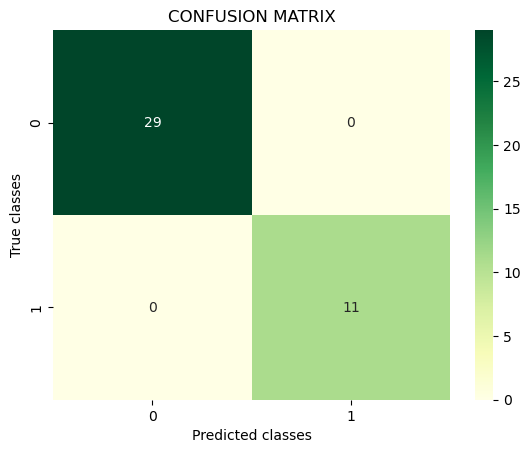

<Figure size 600x600 with 0 Axes>

confusion matrix for ADABOOST  is 
TP =  11  FP =  0  FN =  0  TN =  29
********** ACCURACY ************
Accuracy for  ADABOOST  =  100.0
********** SENSITIVITY ************
Sensitivity for  ADABOOST  =  100.0
********** SPECIFICITY ************
Specificity for  ADABOOST  =  100.0


In [50]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=100,learning_rate=1,random_state=1)
abc.fit(x_train, y_train)
pred_abc = abc.predict(x_test)
content("ADABOOST",y_test,pred_abc)

2)SUPPORT VECTOR MACHINE

########## SVM ##########


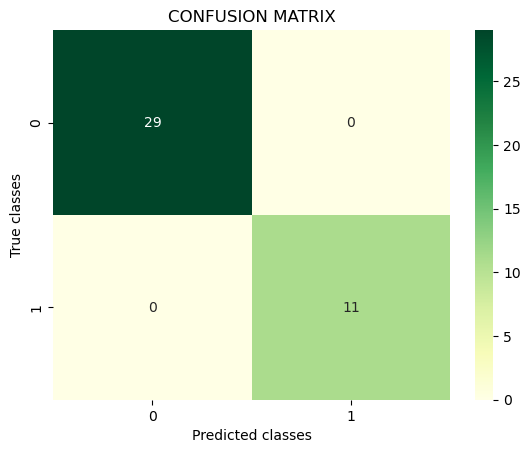

<Figure size 600x600 with 0 Axes>

confusion matrix for SVM  is 
TP =  11  FP =  0  FN =  0  TN =  29
********** ACCURACY ************
Accuracy for  SVM  =  100.0
********** SENSITIVITY ************
Sensitivity for  SVM  =  100.0
********** SPECIFICITY ************
Specificity for  SVM  =  100.0


In [51]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)
content("SVM",y_test,pred_svc)

3)RANDOM FOREST CLASSIFIER

########## ranfor ##########


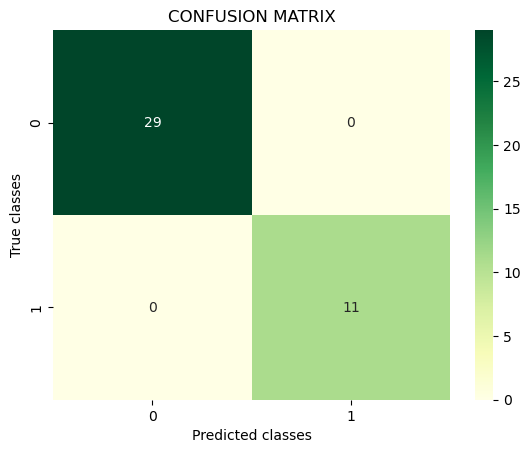

<Figure size 600x600 with 0 Axes>

confusion matrix for ranfor  is 
TP =  11  FP =  0  FN =  0  TN =  29
********** ACCURACY ************
Accuracy for  ranfor  =  100.0
********** SENSITIVITY ************
Sensitivity for  ranfor  =  100.0
********** SPECIFICITY ************
Specificity for  ranfor  =  100.0


In [52]:
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(x_train, y_train)
pred_ranfor=ranfor.predict(x_test)
content("ranfor",y_test, pred_svc)

4) KNN ALGORITHM 

########## KNN ALGORITHM ##########


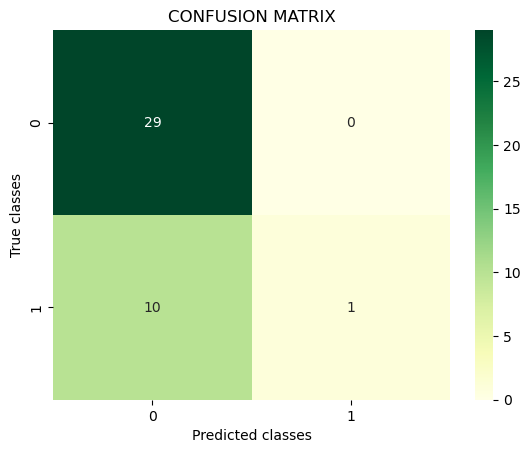

<Figure size 600x600 with 0 Axes>

confusion matrix for KNN ALGORITHM  is 
TP =  1  FP =  0  FN =  10  TN =  29
********** ACCURACY ************
Accuracy for  KNN ALGORITHM  =  75.0
********** SENSITIVITY ************
Sensitivity for  KNN ALGORITHM  =  9.09
********** SPECIFICITY ************
Specificity for  KNN ALGORITHM  =  100.0


In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
content("KNN ALGORITHM",y_test,y_pred)

5) MLP CLASSIFIER

########## MLPClassifier ##########


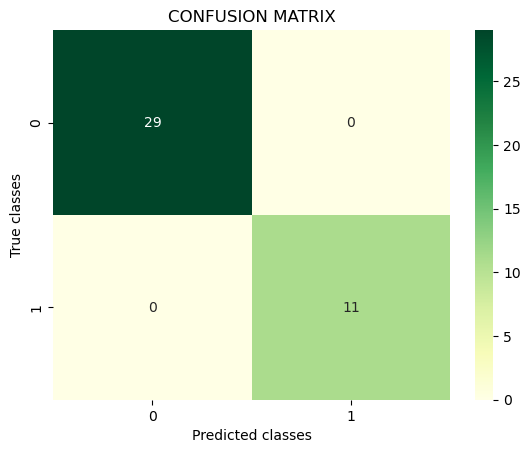

<Figure size 600x600 with 0 Axes>

confusion matrix for MLPClassifier  is 
TP =  11  FP =  0  FN =  0  TN =  29
********** ACCURACY ************
Accuracy for  MLPClassifier  =  100.0
********** SENSITIVITY ************
Sensitivity for  MLPClassifier  =  100.0
********** SPECIFICITY ************
Specificity for  MLPClassifier  =  100.0


In [54]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=300)
clf.fit(x_train, y_train)
pred_clf=clf.predict(x_test)
content("MLPClassifier",y_test, pred_clf)

6) NAIVE BAYES

########## load_iris ##########


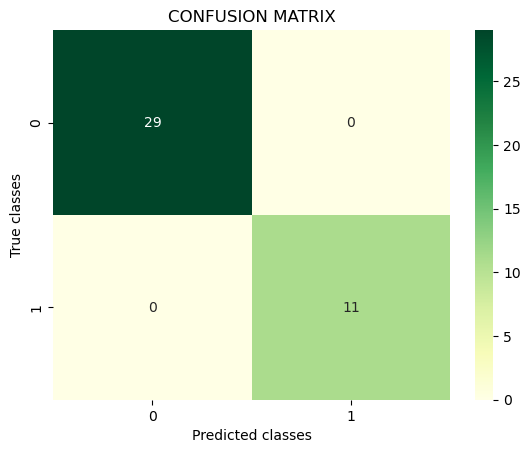

<Figure size 600x600 with 0 Axes>

confusion matrix for load_iris  is 
TP =  11  FP =  0  FN =  0  TN =  29
********** ACCURACY ************
Accuracy for  load_iris  =  100.0
********** SENSITIVITY ************
Sensitivity for  load_iris  =  100.0
********** SPECIFICITY ************
Specificity for  load_iris  =  100.0


In [55]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
pred_gnb=gnb.predict(x_test)
content("NAIVE BAYES",y_test, pred_gnb)

7) DecisionTreeClassifier

########## decision_tree ##########


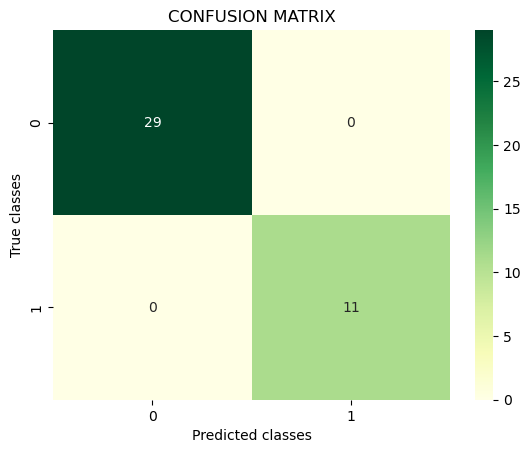

<Figure size 600x600 with 0 Axes>

confusion matrix for decision_tree  is 
TP =  11  FP =  0  FN =  0  TN =  29
********** ACCURACY ************
Accuracy for  decision_tree  =  100.0
********** SENSITIVITY ************
Sensitivity for  decision_tree  =  100.0
********** SPECIFICITY ************
Specificity for  decision_tree  =  100.0


In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree.fit(x_train, y_train)
pred_decision_tree=decision_tree.predict(x_test)
content("decision_tree",y_test, pred_decision_tree)

8) LogisticRegression

########## LogisticRegression ##########


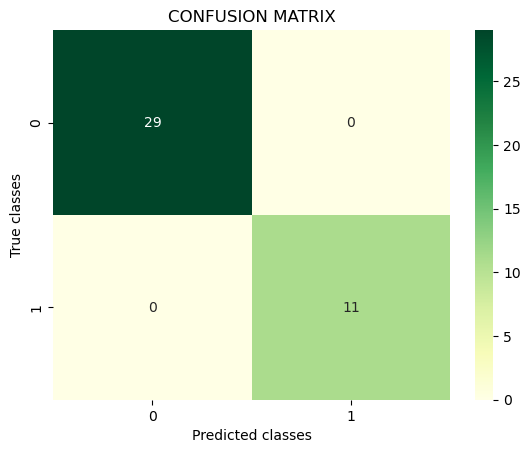

<Figure size 600x600 with 0 Axes>

confusion matrix for LogisticRegression  is 
TP =  11  FP =  0  FN =  0  TN =  29
********** ACCURACY ************
Accuracy for  LogisticRegression  =  100.0
********** SENSITIVITY ************
Sensitivity for  LogisticRegression  =  100.0
********** SPECIFICITY ************
Specificity for  LogisticRegression  =  100.0


In [57]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
clf = LogisticRegression(random_state=0)
clf.fit(x_train, y_train)
pred_clf=clf.predict(x_test)
content("LogisticRegression",y_test, pred_clf)

9) GradientBoostingClassifier

########## GradientBoostingClassifier ##########


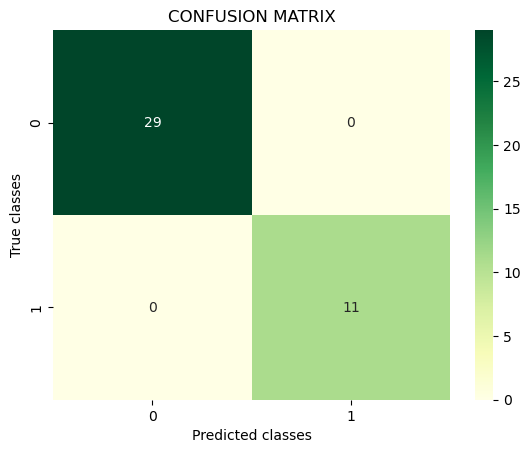

<Figure size 600x600 with 0 Axes>

confusion matrix for GradientBoostingClassifier  is 
TP =  11  FP =  0  FN =  0  TN =  29
********** ACCURACY ************
Accuracy for  GradientBoostingClassifier  =  100.0
********** SENSITIVITY ************
Sensitivity for  GradientBoostingClassifier  =  100.0
********** SPECIFICITY ************
Specificity for  GradientBoostingClassifier  =  100.0


In [58]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
clf.fit(x_train, y_train)
pred_clf=clf.predict(x_test)
content("GradientBoostingClassifier",y_test, pred_clf)